In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy import stats
from sklearn import feature_selection

In [31]:
df = pd.read_csv("data.csv", sep='\t')
columns = df.columns[:-6]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 169 entries, A1 to elapsed
dtypes: int64(168), object(1)
memory usage: 63.4+ MB


In [33]:
df.count()

A1          49159
A2          49159
A3          49159
A4          49159
A5          49159
            ...  
gender      49159
accuracy    49159
country     49142
source      49159
elapsed     49159
Length: 169, dtype: int64

In [34]:
df.isnull().sum().sort_values(ascending=False)

country    17
elapsed     0
E10         0
F8          0
F7          0
           ..
K8          0
K7          0
K6          0
K5          0
A1          0
Length: 169, dtype: int64

In [35]:
for x in range(0,len(df.columns),20):
    display(df.iloc[:,x:x+20].describe().iloc[1:,:].round(2))


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
mean,3.65,3.79,3.8,3.63,3.83,3.67,3.87,2.96,2.14,2.43,3.68,3.50,4.14,4.32,3.98,3.50,3.51,3.79,2.99,2.61
std,1.14,1.06,1.1,1.07,0.99,0.98,0.96,1.17,1.04,1.08,1.01,1.08,0.92,0.83,0.99,1.07,1.11,1.01,1.26,1.15
min,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,3.00,3.0,3.00,3.00,3.00,4.00,2.00,1.00,2.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,3.00,2.00,2.00
50%,4.00,4.00,4.0,4.00,4.00,4.00,4.00,3.00,2.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,2.00
75%,4.00,4.00,5.0,4.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00,4.00,5.00,5.00,5.00,4.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,B11,B12,B13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7
mean,2.72,1.91,2.15,2.81,3.64,3.37,3.35,2.93,2.9,2.75,2.31,2.34,2.52,3.45,3.31,3.55,3.48,3.63,3.55,2.65
std,1.26,1.02,1.20,1.18,1.16,1.04,1.14,1.21,1.3,1.24,1.24,1.19,1.14,1.07,1.12,1.10,1.12,1.00,0.98,1.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,1.00,2.00,3.00,3.00,2.00,2.00,2.0,2.00,1.00,1.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00
50%,3.00,2.00,2.00,3.00,4.00,4.00,4.00,3.00,3.0,3.00,2.00,2.00,2.00,4.00,3.00,4.00,4.00,4.00,4.00,3.00
75%,4.00,2.00,3.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7
mean,2.10,2.86,2.46,2.55,2.88,3.79,2.74,3.87,2.80,2.18,3.10,2.08,2.32,3.06,3.63,2.55,3.61,3.34,2.55,2.87
std,0.94,1.05,1.19,1.18,1.32,1.11,1.27,0.96,1.26,1.12,1.29,1.03,1.21,1.14,1.06,1.55,1.15,1.36,1.13,1.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,3.00,2.00,4.00,2.00,1.00,2.00,1.00,1.00,2.00,3.00,1.00,3.00,2.00,2.00,2.00
50%,2.00,3.00,2.00,2.00,3.00,4.00,3.00,4.00,3.00,2.00,3.00,2.00,2.00,3.00,4.00,2.00,4.00,4.00,2.00,3.00
75%,2.00,4.00,3.00,3.00,4.00,5.00,4.00,4.00,4.00,3.00,4.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,F8,F9,F10,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H1,H2,H3,H4,H5,H6,H7
mean,3.51,2.56,3.22,3.43,2.92,3.15,3.31,3.38,2.83,2.78,2.38,3.44,3.08,3.86,3.93,3.53,2.25,3.10,3.63,2.46
std,1.32,1.12,1.12,1.12,1.29,1.25,1.25,1.18,1.27,1.23,1.15,1.25,1.18,1.22,1.09,1.31,1.19,1.38,1.18,1.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,2.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,3.00,4.00,3.00,1.00,2.00,3.00,1.00
50%,4.00,2.00,3.00,4.00,3.00,3.00,4.00,4.00,3.00,3.00,2.00,4.00,3.00,4.00,4.00,4.00,2.00,3.00,4.00,2.00
75%,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,5.00,5.00,5.00,3.00,4.00,5.00,3.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,H8,H9,H10,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,J1,J2,J3,J4,J5,J6,J7
mean,2.53,1.95,2.50,2.69,3.33,3.16,2.85,3.46,2.09,3.06,3.27,3.37,3.24,3.56,3.83,3.53,3.86,3.33,2.85,3.35
std,1.25,1.05,1.16,1.19,1.14,1.10,1.14,1.14,1.11,1.05,1.10,1.04,1.08,1.15,1.15,1.22,1.13,1.06,1.08,1.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,2.00,2.00,2.00,2.00,2.00,3.00,1.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00
50%,2.00,2.00,2.00,2.00,4.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00
75%,4.00,2.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,J8,J9,J10,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,L1,L2,L3,L4,L5,L6,L7
mean,2.83,2.38,2.39,3.04,3.00,2.71,3.26,3.15,3.16,3.03,2.80,3.09,3.52,3.35,2.63,3.12,3.70,3.5,3.18,3.00
std,1.09,1.21,1.19,1.22,1.28,1.28,1.24,1.19,1.28,1.24,1.21,1.26,1.15,1.25,1.17,1.25,1.13,1.2,1.26,1.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,3.00,3.0,2.00,2.00
50%,3.00,2.00,2.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,2.00,3.00,4.00,4.0,3.00,3.00
75%,4.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00


,L8,L9,L10,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,N1,N2,N3,N4,N5,N6,N7
mean,2.66,2.90,3.39,3.83,3.83,4.21,3.48,3.42,2.16,2.13,2.19,2.14,2.34,2.83,3.53,3.88,3.32,3.67,3.69,4.13
std,1.26,1.16,1.16,1.14,1.04,0.86,1.04,1.16,1.11,1.15,1.11,1.01,1.11,1.21,1.13,1.03,1.13,1.20,1.12,0.91
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,3.00,3.00,4.00,3.00,3.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,3.00,3.00,3.00,4.00
50%,2.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00
75%,4.00,4.00,4.00,5.00,5.00,5.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,N8,N9,N10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,P1,P2,P3,P4,P5,P6,P7
mean,3.61,3.45,2.62,3.57,2.71,3.59,3.45,3.58,2.95,2.84,3.16,2.99,3.44,2.94,2.67,2.98,3.11,2.60,3.10,2.80
std,1.07,1.19,1.20,1.10,1.23,1.02,1.12,1.01,1.22,1.21,1.34,1.29,1.18,1.23,1.24,1.17,1.14,1.02,1.16,1.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,4.00,4.00,2.00,4.00,3.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


,P8,P9,P10,age,gender,accuracy,source,elapsed
mean,2.93,3.64,3.46,4.371320e+04,1.60,4.764119e+04,2.85,2506.21
std,1.21,1.10,1.12,9.685640e+06,0.51,9.704611e+06,2.22,50828.19
min,0.00,0.00,0.00,1.300000e+01,0.00,1.000000e+00,1.00,5.00
25%,2.00,3.00,3.00,1.800000e+01,1.00,8.500000e+01,1.00,584.00
50%,3.00,4.00,4.00,2.100000e+01,2.00,9.000000e+01,2.00,754.00
75%,4.00,4.00,4.00,3.000000e+01,2.00,9.700000e+01,6.00,1045.00
max,5.00,5.00,5.00,2.147484e+09,3.00,2.147484e+09,6.00,8534589.00


<AxesSubplot:>

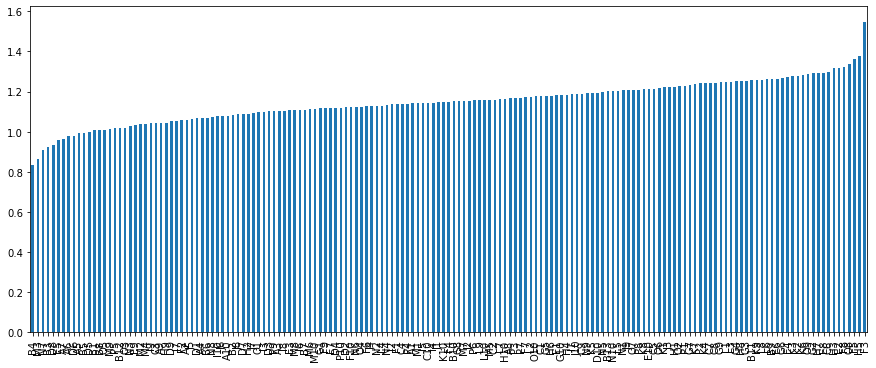

In [36]:
std_df = df.iloc[:,:-6].describe().iloc[2,:]
sorted_std_df = std_df.sort_values()
sorted_std_df.plot(kind='bar', figsize=(15,6))

<AxesSubplot:>

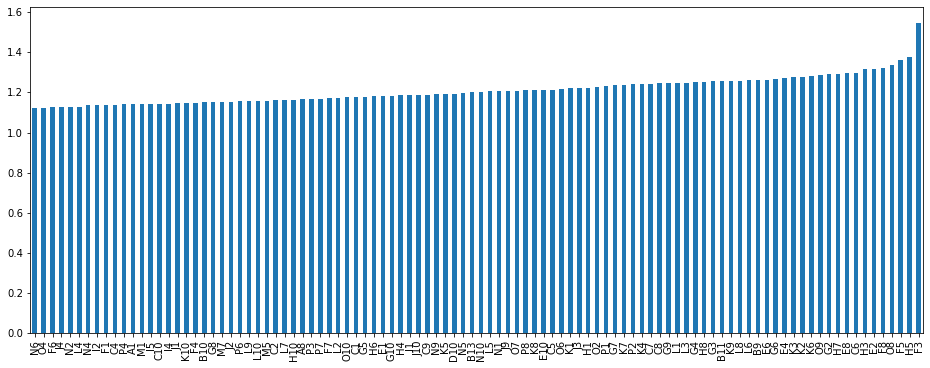

In [37]:
threshold = 1.123
reduced_std_df = sorted_std_df[sorted_std_df > threshold]
reduced_std_df.plot(kind='bar', figsize=(16,6))

In [38]:
df = df[reduced_std_df.index]
columns = list(df.columns)

In [39]:
m_corr = df.iloc[:,0:163].corr().round(2)
display(m_corr)

,N6,O4,F6,J4,N2,L4,N4,I2,F1,C4,...,H7,E8,C6,H3,E2,F8,O8,F5,H5,F3
N6,1.00,0.18,0.09,0.23,0.40,0.13,0.59,0.18,0.09,0.13,...,0.07,0.34,0.12,0.26,-0.19,0.07,0.06,0.03,0.07,0.02
O4,0.18,1.00,0.00,0.07,0.24,0.16,0.15,0.14,0.23,0.03,...,0.00,0.10,0.07,0.14,0.05,-0.01,-0.13,0.16,0.08,0.11
F6,0.09,0.00,1.00,0.21,0.18,0.07,0.15,0.24,-0.23,0.01,...,0.13,0.14,0.24,0.11,0.05,0.24,0.24,-0.19,0.00,-0.13
J4,0.23,0.07,0.21,1.00,0.22,0.28,0.23,0.23,-0.05,0.07,...,0.00,0.16,0.27,0.19,0.02,0.22,0.29,-0.04,0.16,-0.02
N2,0.40,0.24,0.18,0.22,1.00,0.19,0.45,0.27,0.08,0.00,...,0.10,0.35,0.21,0.23,-0.19,0.10,0.11,-0.02,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F8,0.07,-0.01,0.24,0.22,0.10,0.20,0.07,0.24,-0.08,0.02,...,0.12,0.05,0.22,0.04,0.15,1.00,0.26,-0.06,0.07,-0.23
O8,0.06,-0.13,0.24,0.29,0.11,0.18,0.11,0.18,-0.07,0.04,...,0.09,0.10,0.23,0.07,0.06,0.26,1.00,-0.06,0.10,-0.06
F5,0.03,0.16,-0.19,-0.04,-0.02,0.03,-0.03,-0.03,0.32,0.15,...,-0.05,-0.08,-0.05,0.01,0.19,-0.06,-0.06,1.00,0.12,0.31
H5,0.07,0.08,0.00,0.16,0.03,0.22,0.09,0.02,0.10,-0.04,...,-0.16,0.04,0.22,0.13,0.09,0.07,0.10,0.12,1.00,0.05


In [40]:
n = len(m_corr) - 2
alpha = 0.00001
t_alpha = stats.t.ppf(1-alpha/2, n)
r = m.sqrt(pow(t_alpha,2)/(n+pow(t_alpha,2)))
r

0.4258509028985265

In [41]:
m_corr[abs(m_corr)<r] = 0
m_corr[np.tril(np.ones(m_corr.shape)).astype(bool)] = 0
graph_df = m_corr.copy()
graph_df = graph_df.apply(lambda x : x.apply(abs))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 121
Average degree:   2.4200


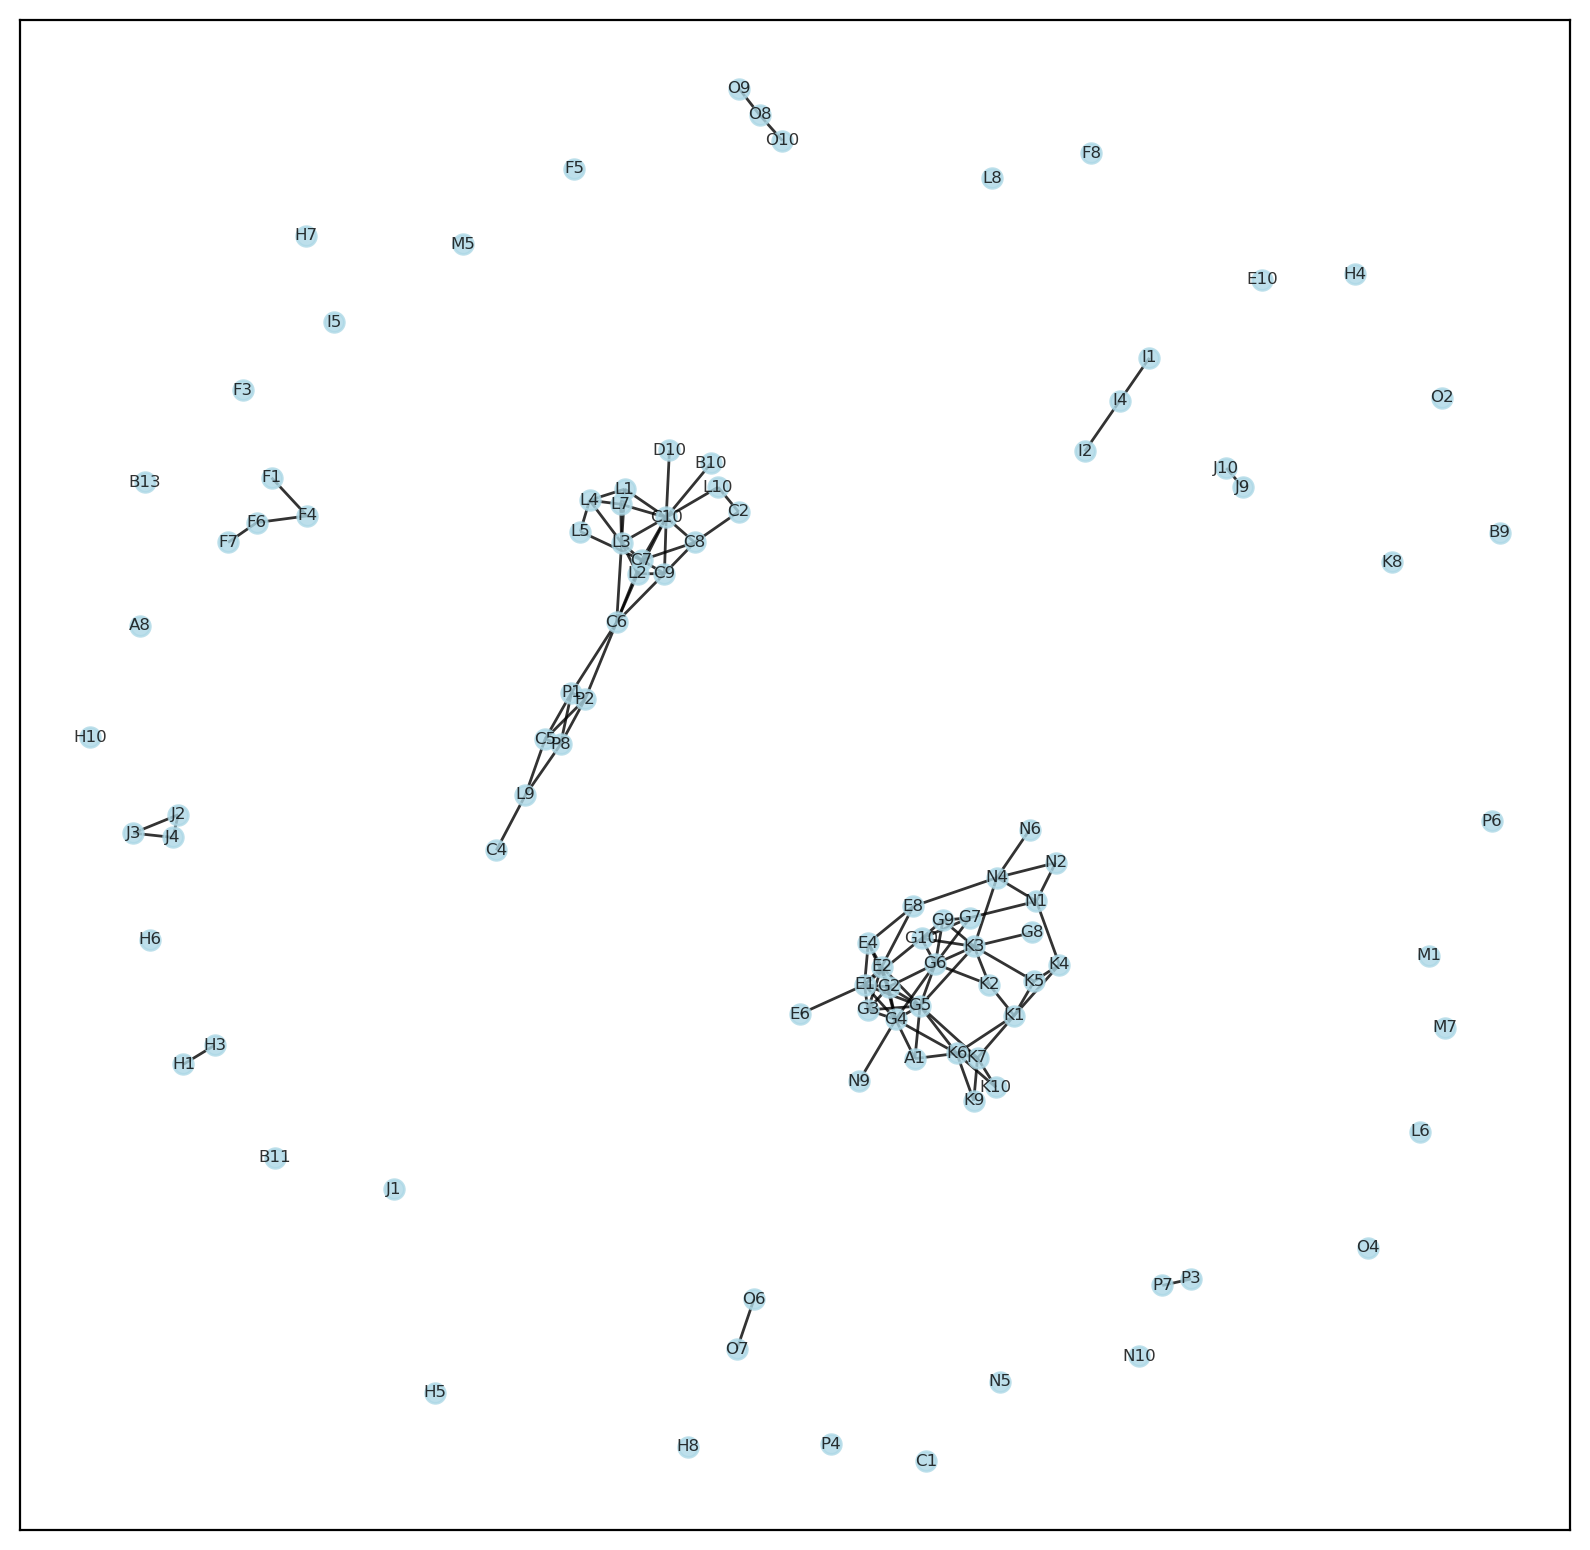

In [42]:
import networkx as nx
G = nx.from_pandas_adjacency(graph_df)
print(nx.info(G))

#pos = nx.kamada_kawai_layout(G)
plt.figure(1, figsize=(10,10), dpi=200)
nx.draw_networkx(G, with_labels=True, node_size=50,font_size=6, node_color='lightblue', alpha=0.8)
plt.savefig("path_graph.png")
plt.show()

In [43]:
sorted(nx.degree_centrality(G).items(), key=lambda x : x[1], reverse=True)[:10]

[('C10', 0.10101010101010102),
 ('G5', 0.10101010101010102),
 ('G4', 0.09090909090909091),
 ('E1', 0.08080808080808081),
 ('G6', 0.08080808080808081),
 ('K3', 0.08080808080808081),
 ('C7', 0.07070707070707072),
 ('L3', 0.07070707070707072),
 ('K6', 0.07070707070707072),
 ('G2', 0.07070707070707072)]

In [44]:
sorted(nx.betweenness_centrality(G, normalized=False).items(), key=lambda x : x[1], reverse=True)[:10]

[('K3', 96.65238095238095),
 ('G5', 95.27857142857142),
 ('C6', 84.39285714285714),
 ('C10', 64.52857142857144),
 ('N4', 60.04999999999999),
 ('G4', 51.1095238095238),
 ('G6', 48.37857142857142),
 ('K6', 47.90238095238096),
 ('E1', 40.75),
 ('L3', 34.179761904761904)]

In [45]:
graphs = nx.connected_components(G)
for g in graphs:
    print(g, len(g))
    print()

{'K2', 'E8', 'G6', 'K5', 'N6', 'K6', 'E1', 'E2', 'K3', 'K7', 'G3', 'G5', 'A1', 'K9', 'G9', 'E4', 'N2', 'N9', 'N4', 'N1', 'G8', 'G7', 'K4', 'K10', 'G2', 'G4', 'E6', 'G10', 'K1'} 29

{'O4'} 1

{'F6', 'F1', 'F7', 'F4'} 4

{'J4', 'J3', 'J2'} 3

{'L2', 'B10', 'L7', 'L1', 'L5', 'P2', 'L4', 'C7', 'C8', 'C5', 'L9', 'C9', 'P1', 'C4', 'D10', 'L10', 'C10', 'C2', 'L3', 'P8', 'C6'} 21

{'I2', 'I4', 'I1'} 3

{'P4'} 1

{'M1'} 1

{'I5'} 1

{'J1'} 1

{'M7'} 1

{'P6'} 1

{'M5'} 1

{'H10'} 1

{'A8'} 1

{'P3', 'P7'} 2

{'O9', 'O8', 'O10'} 3

{'C1'} 1

{'H6'} 1

{'H4'} 1

{'J9', 'J10'} 2

{'N5'} 1

{'B13'} 1

{'N10'} 1

{'O7', 'O6'} 2

{'K8'} 1

{'E10'} 1

{'H3', 'H1'} 2

{'O2'} 1

{'H8'} 1

{'B11'} 1

{'L8'} 1

{'L6'} 1

{'B9'} 1

{'H7'} 1

{'F8'} 1

{'F5'} 1

{'H5'} 1

{'F3'} 1



In [46]:
singe_nodes = ['F8', 'M5', 'H6', 'C1', 'H7', 'L8',
               'K8', 'B9', 'M1', 'J1', 'O2', 'H5',
               'P4', 'N10', 'F3', 'O4', 'P6', 'A8',
               'M7', 'B13', 'N5', 'H10', 'L6', 'H4',
               'F5', 'H8', 'E10', 'I5', 'B11']
graphs = []
graphs.append(['F7', 'F6', 'F4', 'F1'])
graphs.append(['I2', 'I4', 'I1'])
graphs.append(['O8', 'O9', 'O10'])
graphs.append(['H1', 'H3'])
graphs.append(['J2', 'J3', 'J4'])
graphs.append(['O6', 'O7'])
graphs.append(['J9', 'J10'])
graphs.append(['P3', 'P7'])
graphs.append(['C4', 'L9', 'C5', 'P8', 'P2', 'P1',
               'C6', 'L2', 'D10', 'B10', 'C9', 'L3',
               'C10', 'C7', 'C8', 'L10', 'C2', 'L1',
               'L7', 'L4', 'L5'])
graphs.append(['N6', 'N4', 'N2', 'N1', 'E8', 'N9',
               'E4', 'E6', 'E1', 'E2', 'G2', 'G3',
               'G4', 'G5', 'A1', 'K6', 'K7', 'K9',
               'K10', 'K1', 'K2', 'K5', 'G8', 'K4',
               'K3', 'G6', 'G10', 'G9', 'G7'])

'Odchylenie standartowe'

F7    1.170314
F6    1.126102
F4    1.148554
F1    1.138122
Name: std, dtype: float64

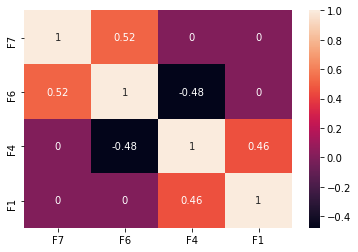

'Odchylenie standartowe'

I2    1.135489
I4    1.144267
I1    1.186722
Name: std, dtype: float64

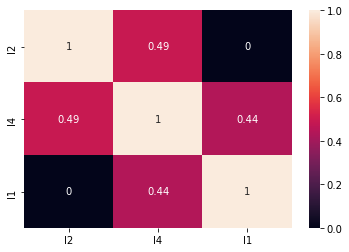

'Odchylenie standartowe'

O8     1.335426
O9     1.285741
O10    1.175737
Name: std, dtype: float64

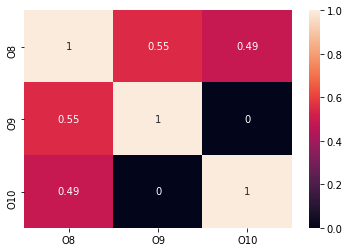

'Odchylenie standartowe'

H1    1.224138
H3    1.314799
Name: std, dtype: float64

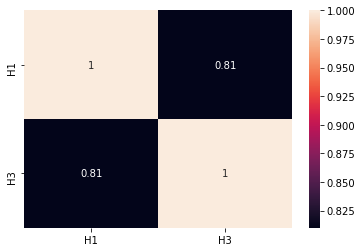

'Odchylenie standartowe'

J2    1.154634
J3    1.222970
J4    1.127113
Name: std, dtype: float64

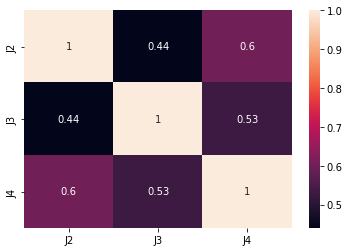

'Odchylenie standartowe'

O6    1.219152
O7    1.208809
Name: std, dtype: float64

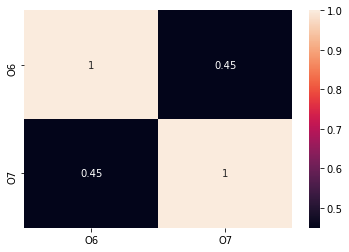

'Odchylenie standartowe'

J9     1.205690
J10    1.186767
Name: std, dtype: float64

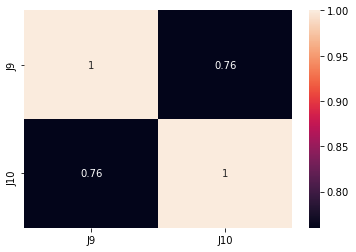

'Odchylenie standartowe'

P3    1.166713
P7    1.169098
Name: std, dtype: float64

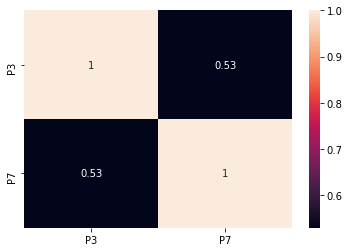

In [47]:
import seaborn as sns

for g in graphs[:-2]:
    corr_df = df[g].corr().round(2)
    corr_df[abs(corr_df)<r] = 0
    display("Odchylenie standartowe")
    display(std_df[g])
    sns.heatmap(corr_df, 
        xticklabels=corr_df.columns,
        yticklabels=corr_df.columns,
        annot=True)
    plt.show()

### Wnioski:
* W wyniku analizy korelacji i wariancji odrzucamy: H1, J10, J4, F6

'Odchylenie standartowe'

C4     1.138612
L9     1.156476
C5     1.213302
P8     1.209906
P2     1.240915
P1     1.229446
C6     1.296478
L2     1.170879
D10    1.193678
B10    1.151811
C9     1.188539
L3     1.249182
C10    1.143850
C7     1.243850
C8     1.244499
L10    1.157339
C2     1.159866
L1     1.245947
L7     1.161363
L4     1.129715
L5     1.204617
Name: std, dtype: float64

'suma korelacji'

C4     1.43
B10    1.43
D10    1.43
L10    1.91
L5     1.91
C2     2.03
L9     2.33
L7     2.83
L1     2.87
L4     2.88
C5     3.04
P8     3.09
C8     3.11
P2     3.18
P1     3.28
L2     3.40
C9     3.45
C6     3.90
L3     4.31
C7     4.49
C10    5.66
dtype: float64

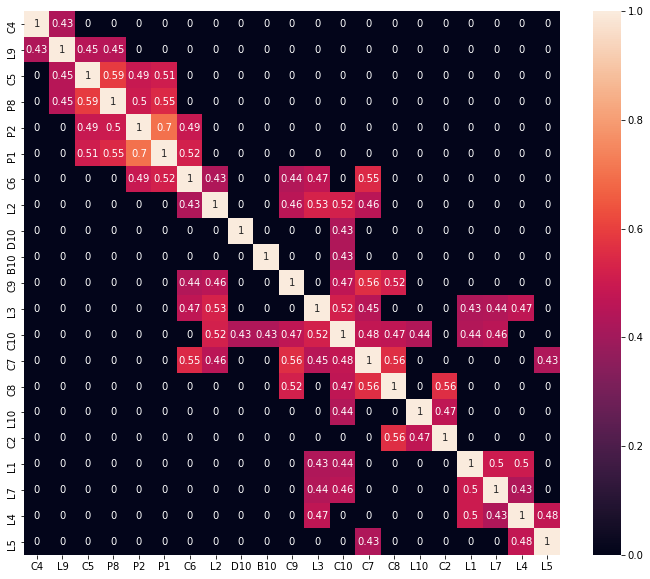

'Odchylenie standartowe'

N6     1.123167
N4     1.134726
N2     1.127255
N1     1.205135
E8     1.294537
N9     1.190972
E4     1.273396
E6     1.262730
E1     1.182456
E2     1.316074
G2     1.290501
G3     1.254693
G4     1.250608
G5     1.179333
A1     1.140966
K6     1.280072
K7     1.235814
K9     1.256940
K10    1.147066
K1     1.220923
K2     1.278184
K5     1.191471
G8     1.152063
K4     1.242364
K3     1.275920
G6     1.268525
G10    1.183644
G9     1.245578
G7     1.234651
Name: std, dtype: float64

'suma korelacji'

E6     1.44
N9     1.45
G8     1.51
N6     1.59
N2     1.93
K10    2.03
K9     2.23
A1     2.35
K2     2.38
K4     2.43
K5     2.48
E8     2.50
G7     2.93
N1     2.94
G9     3.09
E4     3.13
G3     3.31
G10    3.43
K1     3.50
N4     3.52
K7     3.77
K6     4.67
E2     4.72
G2     4.79
K3     4.80
G6     5.05
E1     5.10
G4     5.61
G5     5.98
dtype: float64

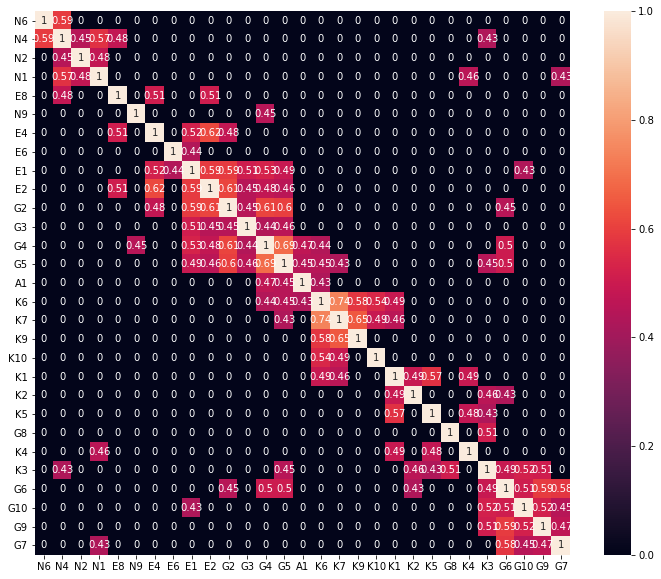

In [48]:
fig, ax = plt.subplots(figsize=(12,10)) 

corr_df = df[graphs[-2]].corr().round(2)
corr_df[abs(corr_df)<r] = 0
corr_df = corr_df.apply(lambda x : x.apply(abs))
display("Odchylenie standartowe")
display(std_df[graphs[-2]])
display("suma korelacji")
display(corr_df.sum().sort_values())
sns.heatmap(corr_df, 
    xticklabels=corr_df.columns,
    yticklabels=corr_df.columns,
    annot=True)
plt.show()

fig, ax = plt.subplots(figsize=(12,10)) 

corr_df = df[graphs[-1]].corr().round(2)
corr_df[abs(corr_df)<r] = 0
corr_df = corr_df.apply(lambda x : x.apply(abs))
display("Odchylenie standartowe")
display(std_df[graphs[-1]])
display("suma korelacji")
display(corr_df.sum().sort_values())
sns.heatmap(corr_df, 
    xticklabels=corr_df.columns,
    yticklabels=corr_df.columns,
    annot=True)
plt.show()

Odrzucamy:
* z pierwszego grafu: C10, C7, L3, C6, C9, L2, P8, P1.
* z drugiego grafu: G5, N4, G6, K6, E2, G2, K7, E1

In [49]:
col = list(columns)

In [50]:
r = ['C10','G5','G4', 'E1','G6','K3', 'C7', 'L3', 'K6', 'G2']
r += ['K3', 'G5', 'C6', 'C10', 'N4', 'G4', 'G6', 'K6', 'E1', 'L3']
r += ['J4', 'H1', 'K7', 'K5', 'P1', 'P8', 'E2', 'C8', 'J9']
r += ['G10', 'P3', 'G10', 'F6', 'O9']


for x in r:
    if x in col: col.remove(x)

len(col)

75

In [51]:
df = df[col]
m_corr = df.corr().round(2)
m_corr

,N6,O4,N2,L4,I2,F1,C4,P4,A1,M1,...,E4,K2,H7,E8,H3,F8,O8,F5,H5,F3
N6,1.00,0.18,0.40,0.13,0.18,0.09,0.13,0.13,0.03,0.18,...,-0.22,0.27,0.07,0.34,0.26,0.07,0.06,0.03,0.07,0.02
O4,0.18,1.00,0.24,0.16,0.14,0.23,0.03,0.18,0.16,0.13,...,0.03,0.10,0.00,0.10,0.14,-0.01,-0.13,0.16,0.08,0.11
N2,0.40,0.24,1.00,0.19,0.27,0.08,0.00,0.24,-0.04,0.13,...,-0.19,0.34,0.10,0.35,0.23,0.10,0.11,-0.02,0.03,0.00
L4,0.13,0.16,0.19,1.00,0.29,0.09,-0.24,0.24,0.06,0.10,...,-0.00,0.17,0.02,0.19,0.07,0.20,0.18,0.03,0.22,0.02
I2,0.18,0.14,0.27,0.29,1.00,0.05,-0.05,0.32,0.01,0.04,...,-0.01,0.27,0.14,0.20,0.06,0.24,0.18,-0.03,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F8,0.07,-0.01,0.10,0.20,0.24,-0.08,0.02,0.21,0.06,0.05,...,0.12,0.08,0.12,0.05,0.04,1.00,0.26,-0.06,0.07,-0.23
O8,0.06,-0.13,0.11,0.18,0.18,-0.07,0.04,0.15,0.01,0.08,...,0.06,0.14,0.09,0.10,0.07,0.26,1.00,-0.06,0.10,-0.06
F5,0.03,0.16,-0.02,0.03,-0.03,0.32,0.15,-0.00,0.26,0.04,...,0.19,-0.14,-0.05,-0.08,0.01,-0.06,-0.06,1.00,0.12,0.31
H5,0.07,0.08,0.03,0.22,0.02,0.10,-0.04,0.06,0.24,0.18,...,0.09,-0.04,-0.16,0.04,0.13,0.07,0.10,0.12,1.00,0.05


In [52]:
n = len(m_corr) - 2
alpha = 0.000001
t_alpha = stats.t.ppf(1-alpha/2, n)
r = m.sqrt(pow(t_alpha,2)/(n+pow(t_alpha,2)))
r

0.5301478116363385

In [53]:
m_corr[abs(m_corr)<r] = 0
m_corr[np.tril(np.ones(m_corr.shape)).astype(bool)] = 0
graph_df = m_corr.copy()
graph_df = graph_df.apply(lambda x : x.apply(abs))

Name: 
Type: Graph
Number of nodes: 75
Number of edges: 0
Average degree:   0.0000


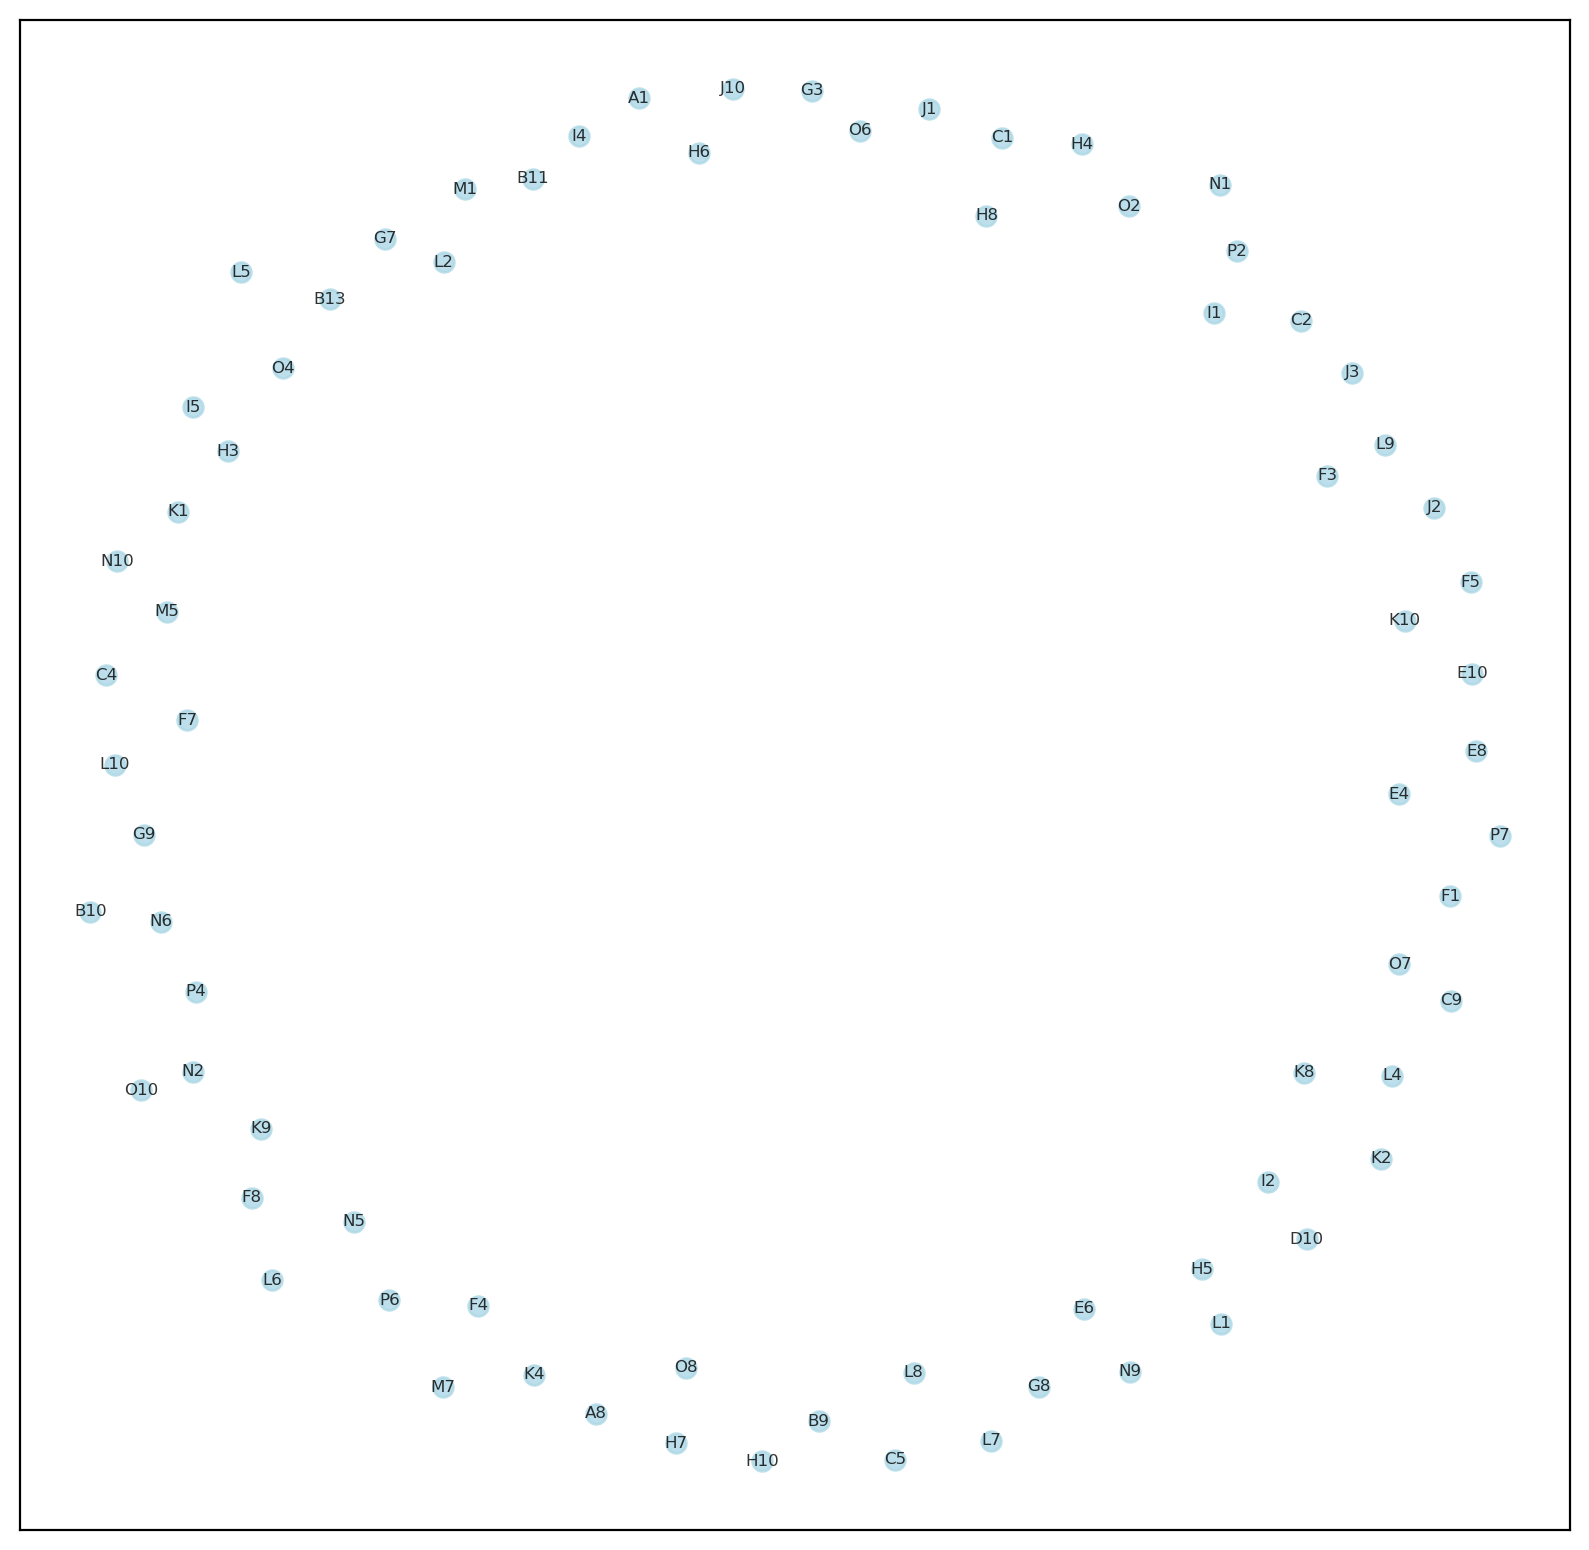

In [54]:
G = nx.from_pandas_adjacency(graph_df)
print(nx.info(G))

#pos = nx.kamada_kawai_layout(G)
plt.figure(1, figsize=(10,10), dpi=200)
nx.draw_networkx(G, with_labels=True, node_size=50,font_size=6, node_color='lightblue', alpha=0.8)
plt.savefig("path_graph.png")
plt.show()

# Wynik
---
Wybrane cechy:

In [55]:
df.columns.sort_values()

Index(['A1', 'A8', 'B10', 'B11', 'B13', 'B9', 'C1', 'C2', 'C4', 'C5', 'C9',
       'D10', 'E10', 'E4', 'E6', 'E8', 'F1', 'F3', 'F4', 'F5', 'F7', 'F8',
       'G3', 'G7', 'G8', 'G9', 'H10', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'I1',
       'I2', 'I4', 'I5', 'J1', 'J10', 'J2', 'J3', 'K1', 'K10', 'K2', 'K4',
       'K8', 'K9', 'L1', 'L10', 'L2', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'M1',
       'M5', 'M7', 'N1', 'N10', 'N2', 'N5', 'N6', 'N9', 'O10', 'O2', 'O4',
       'O6', 'O7', 'O8', 'P2', 'P4', 'P6', 'P7'],
      dtype='object')

In [56]:
df = df[df.columns.sort_values()]

In [57]:
display(df.head())
df.to_csv('selected-features.csv')

,A1,A8,B10,B11,B13,B9,C1,C2,C4,C5,...,O10,O2,O4,O6,O7,O8,P2,P4,P6,P7
0,1,4,2,1,1,1,4,5,4,2,...,4,2,4,2,2,4,5,4,5,1
1,4,4,2,4,1,3,1,2,3,2,...,4,2,2,2,2,3,4,2,2,3
2,3,3,2,2,2,2,2,4,3,3,...,3,2,3,2,3,4,3,2,2,2
3,4,2,3,3,4,3,3,2,4,3,...,4,2,2,4,5,4,2,2,4,2
4,4,1,1,5,2,4,2,4,3,4,...,4,3,3,2,1,2,3,3,3,4


In [58]:
from sklearn.linear_model import LinearRegression

a = df.iloc[0,:] - 3
b = df.iloc[2,:] - 3


a = a / np.linalg.norm(a)
b = b / np.linalg.norm(b)


print("Dopasowanie:")
print("Skala: -1 do 1")
print("-1 oznacza totalne przeciwieństwo")
print("0 oznacza brak podobieństwa")
print("1 oznacza totalne podobieństwo")
print()
print("Wynik")
print(a.dot(b))



Dopasowanie:
Skala: -1 do 1
-1 oznacza totalne przeciwieństwo
0 oznacza brak podobieństwa
1 oznacza totalne podobieństwo

Wynik
0.3286443378682435


In [63]:
df[['B9','B11']].corr()

,B9,B11
B9,1.000000,0.403258
B11,0.403258,1.000000
